In [58]:
import pandas as pd
from sklearn.metrics import log_loss
ds = { 'Modulename':  ['DS01', 'DS01','DS02','DS02','DS02','DS01'],
        'no_of_pax': ['10','12','12','11','15','19']

       }
df = pd.DataFrame(ds)

In [59]:
print(df)

  Modulename no_of_pax
0       DS01        10
1       DS01        12
2       DS02        12
3       DS02        11
4       DS02        15
5       DS01        19


In [60]:
# actual dataset values ( labels for my data values ds02 =1, ds01 = 0 )
y_true = [0,0,1,1,1,0]
# predcited values
y_pred = [0.1, 0.1, 0.9, 0.9, 0.8, 0.1] # predicting the probabilities of being ds01

In [61]:
loss = log_loss(y_true,y_pred )
print(loss)

0.12499102160055686


In [62]:
#logistic regression ( binary classification )

from sklearn.linear_model import LogisticRegression


df['Label'] = df['Modulename'].apply(lambda x: 1 if x == 'DS02' else 0)



In [63]:
df

,Modulename,no_of_pax,Label
0,DS01,10,0
1,DS01,12,0
2,DS02,12,1
3,DS02,11,1
4,DS02,15,1
5,DS01,19,0


In [64]:
#label is classifer or result or the field to be predictd or the Y values
# graduated_pax is the x values


X = df[['no_of_pax']]
y = df['Label']



logreg = LogisticRegression()
print(logreg)

LogisticRegression()


In [65]:
logreg.fit(X, y)

LogisticRegression()

In [66]:

#predict the prbability of module if the size of graduated_pax is 11

prob_ds01 = logreg.predict_proba([[4]])[0][1]

prob_ds01

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7212870476684827

# mathematical formula with single feature
#p(y) = 1/ 1 + e-( B0 + B1 x)

B0 = Intercept
B1 = slope or coefficient for the feature(field)  X
e = base of natural logarithms


# mathematical formula with multiple feature
#p(y) = 1/ 1 + e-( B0 + B1 x1 + B2X2 + B3X3 ......BnXn)



B0 = Intercept  

#MLE maximum likelihood estimation

# extract intercept coefficients
#intercept


In [54]:
# mathematical formula
#p(y) = 1/ 1 + e-( B0 + B1 x)

#MLE maximum likelihood estimation

# extract intercept coefficients
#intercept extracts B0 from the formulas
intercet = logreg.intercept_[0]
# slope of first feature
slope = logreg.coef_[0][0]

print(intercet,slope  )

1.366840174934956 -0.10399635000528093


intercept = 1.366 ( represents the log odds of the outcome when all the predictor variabels are 0 , this is the point where the curve crosses the Y Axis

slope -0.103 = change in the log odds for every one unit change in the predictor vairable / indepedent variable ( graduated_pax )

since the result is negative if implies

if the graduated_pax increases , the log odds of the outcomes decreases( probability of the module name being ds01 is also decrease / or another xample probability of customer buying product called ds01   and vice versa



final conclusion = for every one unit(one learner increase )  increase in the number of nopax of the class , there will be decrease in buying the produc tcalled ds01 by e to the power of -0.103 ( 90%)



in the example of bank classifying a person to be given loan or not ,
if the credit score increases , the probability for giving the loan( 0 or 1 ) also increases , here the slope will be positive



In [67]:
#evaluations
from sklearn.metrics import accuracy_score

# predicting the values for our no of pax
y_pred = logreg.predict(X)

# calcualte accuracy
accuracy =  accuracy_score(y, y_pred)

print( accuracy )


0.5


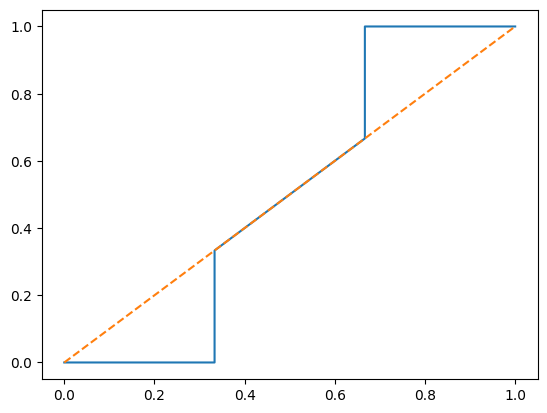

In [72]:
# ROC curve ( recevier operating characteristic )
# plot ( TPR =. true positive rate ) vs FPR( false positive rate )
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
#predict all probabilities
y_prob = logreg.predict_proba(X)[:, 1]
# compute  roc and auc

fpr, tpr , _= roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'ROC curve ' %roc_auc)
plt.plot([0,1], [0,1], linestyle = '--')
